# 88-Inch Foil Activation Experiment to Measure ETA Neutron Spectrum

The source was 33 MeV deuteron break-up on Ta.

This notebook contains the code necessary to generate STAYSL inputs, a description on how to run STAYSL, and the anaysis and plotting of the resulting outputs.  

## BCF

The STASYL BCF input files are generated from the recoded beam current monitor files stores at:

In [1]:
from Support.Utilities import check_path

bcmPath = 'C:/Users/James/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/Activation/33MeVTa_25Apr/BCM/ETA_Trimmed.bcm'
check_path(bcmPath)

The file exists at: C:/Users/James/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/Activation/33MeVTa_25Apr/BCM/ETA_Trimmed.bcm


True

The file used is a modified version of the BCM created file where pre and post calibrations are removed from the file; only the actual irradiation measurements are included.

Support for generating the BCF input files can be found in the [PyScripts Repo](http://github.com/jamesbevins/PyScripts). 

In [2]:
from Unfolding.STAYSL import bcmToBCF

bcfPath = 'C:/Users/James/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/Activation/33MeVTa_25Apr/Unfold/ETA/BCF/flux_history.dat'
bcmToBCF(bcmPath, bcfPath)

The total measurement time was 70418.0 seconds with an integrated measurement of 0.759992152.


The BCF file will be placed at the path indicated above.  The BCF code can be executed by double clicking on the BCF executable and typing in the BCF input file name.

## SHIELD

SHIELD requires a fine group cross section file.  For this, the [14468 group shield cross sections](https://github.com/SlaybaughLab/88_Data/tree/master/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam/SHIELD/shld_xsect.out) were used.

NOTE: SHIELD is only valid/necessary for non-threshold reactions.

The course group structure is specified in the [shldengrp.dat](https://github.com/SlaybaughLab/88_Data/tree/master/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam/SHIELD/shldengrp.dat) file, but this is not required with STAYSL PNNL v 1.2.0.

The [input file](https://github.com/SlaybaughLab/88_Data/tree/master/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam/SHIELD/shldinput.dat) was generated using as measured quantities found in the [foil dimensions spreadsheet](https://github.com/SlaybaughLab/88_Data/blob/master/Experiments/Activation/33MeVTa_25Apr/BeamOnlyData/BeamFoilDimensions.xlsx).

SHIELD is ran by double clicking the SHIELD executable located in the same directory as the input files.

## SigPhi Calculator

The [SigPhi Calculator](https://github.com/SlaybaughLab/88_Data/blob/master/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam/SigPhi_Calculator/SigPhi_Calculator_1.2_CleanBeam.xlsm) was filled in with data from the [foil dimensions spreadsheet](https://github.com/SlaybaughLab/88_Data/blob/master/Experiments/Activation/33MeVTa_25Apr/BeamOnlyData/BeamFoilDimensions.xlsx), [BCF output](https://github.com/SlaybaughLab/88_Data/blob/master/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam/BCF/flux_history.out), and the [experimental analysis data](https://github.com/SlaybaughLab/88_Data/blob/master/Experiments/Activation/33MeVTa_25Apr/33MeV_ETA_Activation_Analysis.pdf).

** Note: the activities are in units of Bq/g and were adjusted as such from the calculated $A_0$ values **

The integral fluxes were calculated using a [STAYSL FIR Run](https://github.com/SlaybaughLab/88_Data/blob/master/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam/SigPhi_Calculator/FIR).  Once the FIR run is created, the integral flux can be calculated from the code segment below and entered into the SigPhi Calculator.

In [5]:
from Unfolding.STAYSL import integralXSecEst

firPath = 'C:/Users/James/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/Activation/33MeVTa_25Apr/Unfold/ETA/SigPhi_Calculator/FIR/'

integralXSecEst(firPath, numRx=6)

The epithermal/thermal ratio is: 171.509974734

AU197G
The > 0.1 flux weighted sigma is: 0.0676332206455
The > 1 flux weighted sigma is: 0.0192244375137
AL27P
The > 0.1 flux weighted sigma is: 0.0219491979955
The > 1 flux weighted sigma is: 0.0219491979955
AL27A
The > 0.1 flux weighted sigma is: 0.0243749813843
The > 1 flux weighted sigma is: 0.0243749813843
NI582
The > 0.1 flux weighted sigma is: 0.00524730850596
The > 1 flux weighted sigma is: 0.00524730850596
IN115N
The > 0.1 flux weighted sigma is: 0.119558244971
The > 1 flux weighted sigma is: 0.112587699734
AU1972
The > 0.1 flux weighted sigma is: 0.386506230663
The > 1 flux weighted sigma is: 0.386506230663
AU197G
The > 0.1 flux weighted sigma is: 0.0676332206455
The > 1 flux weighted sigma is: 0.0192244375137


## STAYSL_PNNL

The STAYSL_PNNL input file was created from the [SigPhi Calculator](https://github.com/SlaybaughLab/88_Data/blob/master/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam/SigPhi_Calculator/SigPhi_Calculator_1.2_CleanBeam.xlsm) and [MCNP simulation results]().

Default values for covariance data using Gaussian formalism were used.

The [SHIELD library input file](https://github.com/SlaybaughLab/88_Data/blob/master/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam/STAYSL_PNNL/sshldlib.dat) is an appropriately named copy of the [SHIELD ouput file](https://github.com/SlaybaughLab/88_Data/blob/master/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam/SHIELD/shldinput.out).

The flux normalization factor (TNORM) for the MCNP flux was calculated using the [Beam Calcs spreadsheet](https://github.com/SlaybaughLab/88_Data/blob/master/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam/STAYSL_PNNL/ETA_88_BeamCalcs.xlsx) and experimental data.

To get the flux and flux uncertainty data from the MCNP output into STAYSL format:

In [20]:
from GeneralNuclear.MCNP import read_tally
from Unfolding.STAYSL import stayslFlux

simPath = 'C:/Users/James/Dropbox/UCB/Research/ETAs/88Inch/Data/Simulated/Activation/33MeVTa/ETA/Model/33MeVTaETA_Foil_tgt.o'
check_path(simPath)

(tallyFrame, tallyTot, uncertTot) = read_tally(simPath, 214, readGroups=True, splitTally=False)

stayslFlux(tallyFrame)

The file exists at: C:/Users/James/Dropbox/UCB/Research/ETAs/88Inch/Data/Simulated/Activation/33MeVTa/ETA/Model/33MeVTaETA_Foil_tgt.o
The flux:
 1.6468e-11 9.0707e-10 2.9543e-09 7.8413e-09 5.2285e-09 5.0468e-09 3.5957e-09 
 4.6256e-09 4.4179e-09 2.4311e-09 2.2658e-09 3.0180e-09 2.7528e-09 2.5893e-09 
 1.5780e-09 1.9745e-09 1.8180e-09 2.1505e-09 2.8090e-09 1.4810e-09 2.1798e-09 
 3.0032e-09 2.7154e-09 2.8542e-09 2.1666e-09 2.1506e-09 2.9714e-09 2.1209e-09 
 2.3652e-09 2.7093e-09 3.5457e-09 2.9630e-09 4.4622e-09 4.2060e-09 3.6101e-09 
 6.2536e-09 6.0452e-09 1.0769e-08 9.3502e-09 1.6694e-08 2.1227e-08 3.5856e-08 
 3.6851e-08 4.6560e-08 8.6100e-08 1.2247e-07 1.0211e-07 2.0013e-07 2.4294e-07 
 4.7542e-07 3.9616e-07 5.7358e-07 4.9649e-07 6.2806e-07 5.8730e-07 6.9612e-07 
 7.2363e-07 5.8377e-07 8.0606e-07 7.7685e-07 8.9746e-07 9.1129e-07 8.7929e-07 
 8.4973e-07 9.7708e-07 9.7301e-07 9.6018e-07 8.6848e-07 1.1242e-06 1.0345e-06 
 2.2239e-06 1.7931e-06 1.5339e-06 1.3001e-06 1.0891e-06 1.3170e-06

The STAYSL code is ran by double clicking the executable or running from the command line. 

## Output Analysis

Read the data from the output file using pandas. Convert relative std to absolute.

In [21]:
import pandas as pd

path = 'C:/Users/James/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/Activation/33MeVTa_25Apr/Unfold/ETA/STAYSL_PNNL/stayslin.out'
df = pd.read_table(path, engine='python', sep='\s+', skiprows=101, skipfooter=649, header=None,
                   names=['lowE', 'adjFlux', 'unadjFlux', 'fluxRatio', 'adjStd', 
                          'unadjStd', 'uncertRatio', 'integralFlux', 'intFluxUncert'])

df.apply(pd.to_numeric)
df['adjStd'] = df['adjStd'] * df['adjFlux'] / 100
df['unadjStd'] = df['unadjStd'] * df['unadjFlux'] / 100

df

,lowE,adjFlux,unadjFlux,fluxRatio,adjStd,unadjStd,uncertRatio,integralFlux,intFluxUncert
1,1.000000e-10,8.115700e+08,1.123200e+08,7.225,6.902403e+08,1.123200e+08,0.850,279800.000,0.57
2,1.000000e-09,1.258500e+09,6.186800e+08,2.034,1.549214e+08,9.366815e+07,0.813,279800.000,0.57
3,1.000000e-08,2.472200e+09,1.395000e+09,1.772,1.987649e+08,1.450800e+08,0.773,279790.000,0.57
4,2.300000e-08,2.758200e+09,1.782700e+09,1.547,1.392891e+08,1.231846e+08,0.731,279760.000,0.57
5,5.000000e-08,1.996200e+09,1.234400e+09,1.617,1.012073e+08,9.060496e+07,0.692,279680.000,0.57
6,7.600000e-08,1.492100e+09,7.943600e+08,1.878,9.728492e+07,7.895938e+07,0.656,279630.000,0.57
7,1.150000e-07,9.947900e+08,4.013200e+08,2.479,1.007722e+08,6.493358e+07,0.626,279570.000,0.57
8,1.700000e-07,6.242300e+08,3.340500e+08,1.869,3.551869e+07,3.150092e+07,0.603,279520.000,0.57
9,2.550000e-07,4.109500e+08,2.169600e+08,1.894,2.362962e+07,2.106682e+07,0.592,279460.000,0.57
10,3.800000e-07,1.820500e+08,8.778500e+07,2.074,1.272530e+07,1.036741e+07,0.592,279410.000,0.57


Convert to Histograms.  Convert the differential histo to flux.

In [33]:
from DataAnalysis.Histograms import Histogram
import matplotlib
%matplotlib inline

outpath = 'C:/Users/James/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/Activation/33MeVTa_25Apr/Unfold/ETA/'

adjDiffHisto = Histogram()
adjDiffHisto.build_histo(df['lowE'].tolist(), df['adjFlux'].tolist(), uncert=df['adjStd'].tolist(),
                         edgeLoc='low', name='STAYSL')

unadjDiffHisto = Histogram()
unadjDiffHisto.build_histo(df['lowE'].tolist(), df['unadjFlux'].tolist(), uncert=df['unadjStd'].tolist(),
                           edgeLoc='low', name='MCNP')

adjHisto = Histogram()
adjHisto.build_histo(df['lowE'].tolist(),
                     bin_integration(df['lowE'].tolist(), df['adjFlux'].tolist(), 'low'),
                     uncert=bin_integration(df['lowE'].tolist(), df['adjStd'].tolist(), 'low'),
                     edgeLoc='low', name='STAYSL')

Read in and store MCNP simulation results.

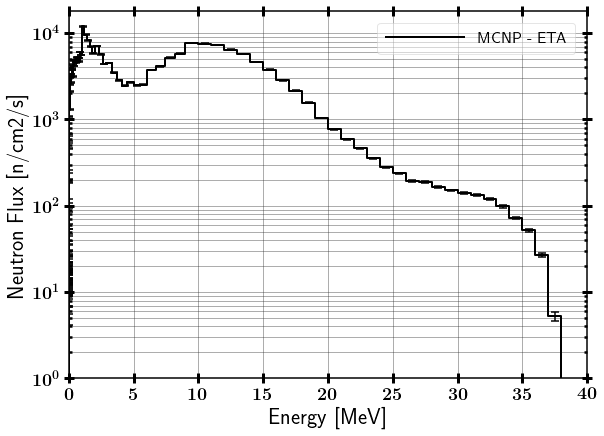

In [52]:
from DataAnalysis.DataManipulation import bin_integration

mcnpHisto = Histogram()
normFactor = 5.37E9 #6.35E7
tallyFrame['normTally'] = tallyFrame['tally'] * normFactor
tallyFrame['normUncertainty'] = tallyFrame['uncertainty'] * tallyFrame['normTally']
mcnpHisto.build_histo(tallyFrame['bin'].tolist(), tallyFrame['normTally'].tolist(), 
                       uncert=tallyFrame['normUncertainty'].tolist(), edgeLoc='up', name='MCNP - ETA')
mcnpHisto.plot(xMin=1E-6, xMax=40, yMin=1, logX=False, logY=True, includeMarkers=False,
               title='', xLabel='Energy [MeV]', yLabel='Neutron Flux [n/cm2/s]',
               savePath=outpath+'33MeVTa_MCNP')

Plot the normalized 33 MeV d Breakup source vs Modeled MCNP ETA results

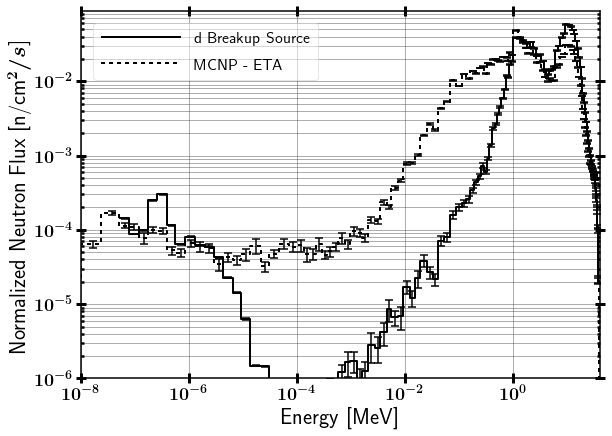

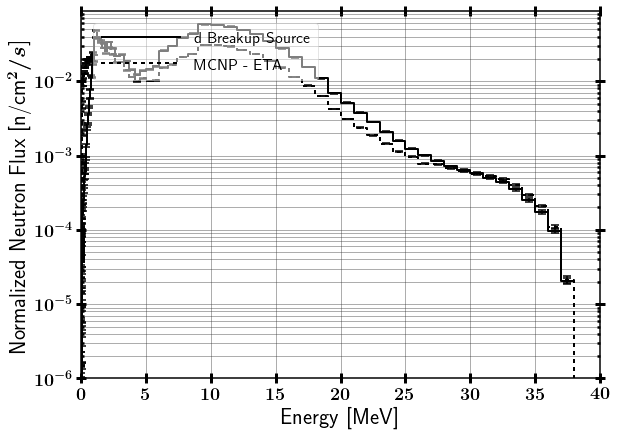

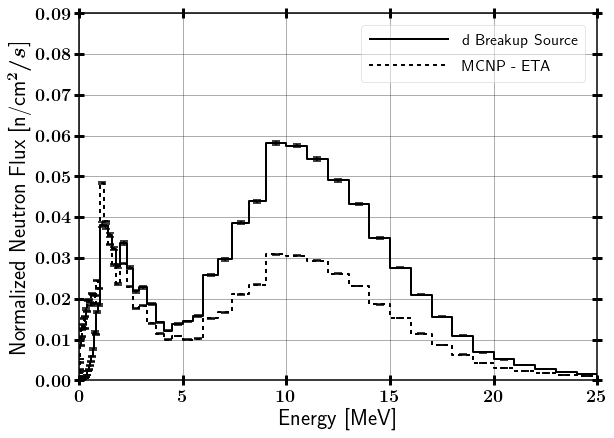

In [41]:
import numpy as np

path = 'C:/Users/James/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam/STAYSL_PNNL/Iteration3/stayslin.out'
beamDF = pd.read_table(path, engine='python', sep='\s+', skiprows=101, skipfooter=649, header=None,
                       names=['lowE', 'adjFlux', 'unadjFlux', 'fluxRatio', 'adjStd', 
                       'unadjStd', 'uncertRatio', 'integralFlux', 'intFluxUncert'])

beamDF.apply(pd.to_numeric)
beamDF['adjFlux'] = bin_integration(beamDF['lowE'].tolist(), beamDF['adjFlux'].tolist(), 'low')
beamDF['adjStd'] = beamDF['adjStd'] / 100
beamDF['normAdjFlux'] = beamDF['adjFlux'] / sum(beamDF['adjFlux'])
beamDF['normAdjStd'] = beamDF['adjStd'] * beamDF['normAdjFlux']

mcnpBeamNormHisto = Histogram()
mcnpBeamNormHisto.build_histo(beamDF['lowE'].tolist(), beamDF['normAdjFlux'].tolist(), 
                              uncert=beamDF['normAdjStd'].tolist(), edgeLoc='low',
                              name='d Breakup Source')

mcnpETANormHisto = Histogram()
mcnpETANormHisto.build_histo(tallyFrame['bin'].tolist(), 
                             (tallyFrame['tally']* (1.0 / sum(tallyFrame['tally']))).tolist(), 
                             uncert=(tallyFrame['uncertainty']*tallyFrame['tally']*(1.0/sum(tallyFrame['tally']))).tolist(),
                             edgeLoc='up', name='MCNP - ETA')

mcnpBeamNormHisto.plot(mcnpETANormHisto, xMin=1E-8, xMax=40, yMin=1E-6, logX=True, logY=True, legendLoc=2,
                      includeMarkers=False, title='',
                      xLabel='Energy [MeV]', yLabel='Normalized Neutron Flux [n/cm^2/s]',
                      savePath=outpath+'33MeVTa_MCNP_NormComp_log')

mcnpBeamNormHisto.plot(mcnpETANormHisto, xMin=1E-8, xMax=40, yMin=1E-6, logX=False, logY=True, legendLoc=2,
                      includeMarkers=False, title='',
                      xLabel='Energy [MeV]', yLabel='Normalized Neutron Flux [n/cm^2/s]',
                      savePath=outpath+'33MeVTa_MCNP_NormComp_semilog')

mcnpBeamNormHisto.plot(mcnpETANormHisto, xMin=0, xMax=25, yMax=0.09, logX=False, logY=False, legendLoc=1,
                      includeMarkers=False, title='',
                      xLabel='Energy [MeV]', yLabel='Normalized Neutron Flux [n/cm^2/s]',
                      savePath=outpath+'33MeVTa_MCNP_NormComp_lin')

Plot the 33 MeV d Breakup source vs Modeled MCNP ETA results

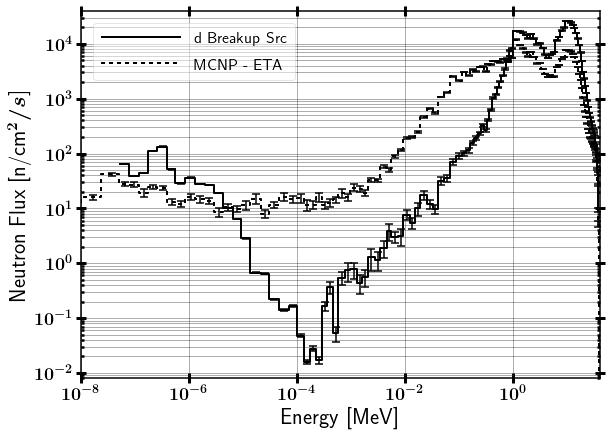

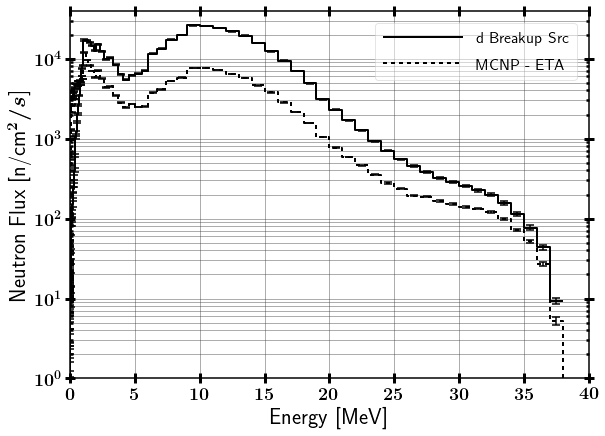

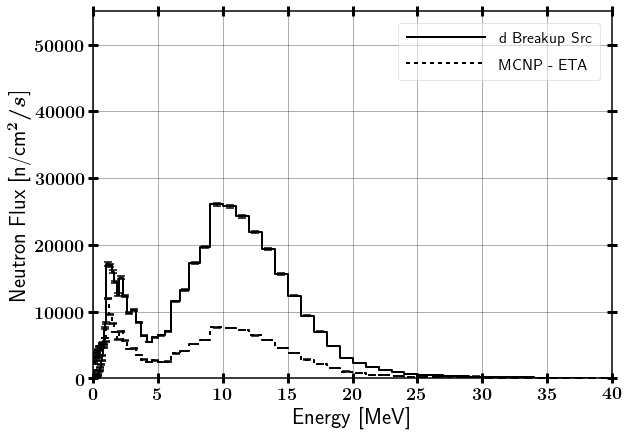

In [40]:
mcnpBeamHisto = Histogram()
mcnpBeamHisto.build_histo(beamDF['lowE'].tolist(), beamDF['adjFlux'].tolist(), 
                          uncert=(beamDF['adjStd']*beamDF['adjFlux']).tolist(), edgeLoc='low',
                          name='d Breakup Src')

mcnpBeamHisto.plot(mcnpHisto, xMin=1E-8, xMax=40, logX=True, logY=True, legendLoc=2,
                   includeMarkers=False, title='',
                   xLabel='Energy [MeV]', yLabel='Neutron Flux [n/cm^2/s]',
                   savePath=outpath+'33MeVTa_MCNP_Comp_log')

mcnpBeamHisto.plot(mcnpHisto, xMin=1E-3, xMax=40, yMin=1, logX=False, logY=True,
                   includeMarkers=False, title='',
                   xLabel='Energy [MeV]', yLabel='Neutron Flux [n/cm^2/s]',
                   savePath=outpath+'33MeVTa_MCNP_Comp_semilog')

mcnpBeamHisto.plot(mcnpHisto, xMin=0, xMax=40, yMax=5.5E4, logX=False, logY=False,
                   includeMarkers=False, title='',
                   xLabel='Energy [MeV]', yLabel='Neutron Flux [n/cm^2/s]',
                   savePath=outpath+'33MeVTa_MCNP_Comp_lin')

### Iterative Solution #1:

  - No modifications are made to the MCNP results for the guess spectrum
  - It does update the uncertainty throughout the convergence process. 

In [26]:
from Unfolding.STAYSL import IterativeSTAYSL

stayslPath = 'C:/Users/James/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/Activation/33MeVTa_25Apr/Unfold/ETA/STAYSL_PNNL/Iteration1/'

# Build Data Structure Lists
iterSoln = []
iterAdjHisto = []
iterRatioHisto = []

iterSoln.append(IterativeSTAYSL(stayslPath, updateStd=True, chiConv=.001))
print iterSoln[-1]

iterSoln[-1].run()

# Add to plot lists
iterAdjHisto.append(Histogram())
iterRatioHisto.append(Histogram())

IterativeSTYASL:
STAYSL Path: C:/Users/James/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/Activation/33MeVTa_25Apr/Unfold/ETA/STAYSL_PNNL/Iteration1/
$\chi^2$ Convergence: 0.001
Flux Std  Convergence: 0.1
Update Flux Std Each Iteration: True
Number of Energy Groups: 140

The file exists at: C:/Users/James/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/Activation/33MeVTa_25Apr/Unfold/ETA/STAYSL_PNNL/Iteration1/stayslin.out
Chi^2 = 65.7211, Std Norm = 1.14385383245
Chi^2 = 36.95881
Chi^2 = 30.3862
Chi^2 = 26.44137
Chi^2 = 23.03402
Chi^2 = 19.99981
Chi^2 = 17.3354
Chi^2 = 15.03831
Chi^2 = 13.09089
Chi^2 = 11.4563
Chi^2 = 10.09602
Chi^2 = 8.96886
Chi^2 = 8.03669
Chi^2 = 7.26591
Chi^2 = 6.62843
Chi^2 = 6.09941
Chi^2 = 5.65922
Chi^2 = 5.29051
Chi^2 = 4.9814
Chi^2 = 4.71993
Chi^2 = 4.49717
Chi^2 = 4.30659
Chi^2 = 4.14247
Chi^2 = 3.99985
Chi^2 = 3.8752
Chi^2 = 3.76569
Chi^2 = 3.66889
Chi^2 = 3.58285
Chi^2 = 3.5057
Chi^2 = 3.43648
Chi^2 = 3.37397
Chi^2 = 3.31709
Chi^2 = 3.26532
Chi^2 = 

Chi^2 = 1.08784
Chi^2 = 1.08636
Chi^2 = 1.08488
Chi^2 = 1.08345
Chi^2 = 1.08197
Chi^2 = 1.08052
Chi^2 = 1.07909
Chi^2 = 1.07763
Chi^2 = 1.07621
Chi^2 = 1.07476
Chi^2 = 1.0733
Chi^2 = 1.07189
Chi^2 = 1.07045
Chi^2 = 1.06903
Chi^2 = 1.06762
Chi^2 = 1.0662
Chi^2 = 1.06479
Chi^2 = 1.06338
Chi^2 = 1.06196
Chi^2 = 1.06057
Chi^2 = 1.05918
Chi^2 = 1.05778
Chi^2 = 1.05641
Chi^2 = 1.05501
Chi^2 = 1.05364
Chi^2 = 1.05224
Chi^2 = 1.05087
Chi^2 = 1.0495
Chi^2 = 1.04814
Chi^2 = 1.04677
Chi^2 = 1.04541
Chi^2 = 1.04407
Chi^2 = 1.04272
Chi^2 = 1.04136
Chi^2 = 1.04
Chi^2 = 1.03865
Chi^2 = 1.03731
Chi^2 = 1.03598
Chi^2 = 1.03462
Chi^2 = 1.03332
Chi^2 = 1.03197
Chi^2 = 1.03062
Chi^2 = 1.0293
Chi^2 = 1.02798
Chi^2 = 1.02665
Chi^2 = 1.02535
Chi^2 = 1.02406
Chi^2 = 1.02273
Chi^2 = 1.02145
Chi^2 = 1.02014
Chi^2 = 1.01885
Chi^2 = 1.01756
Chi^2 = 1.01624
Chi^2 = 1.01495
Chi^2 = 1.01366
Chi^2 = 1.01238
Chi^2 = 1.0111
Chi^2 = 1.00981
Chi^2 = 1.00854
Chi^2 = 1.00726
Chi^2 = 1.00599
Chi^2 = 1.00473
Chi^2 = 1.00347


Beam TotalFluence = 2.782149e+05
MCNP ETA TotalFluence = 2.470632e+05
STAYSL ETA TotalFluence = 3.503300e+05
Sim to Experimental Chi^2 = 3651.93041917


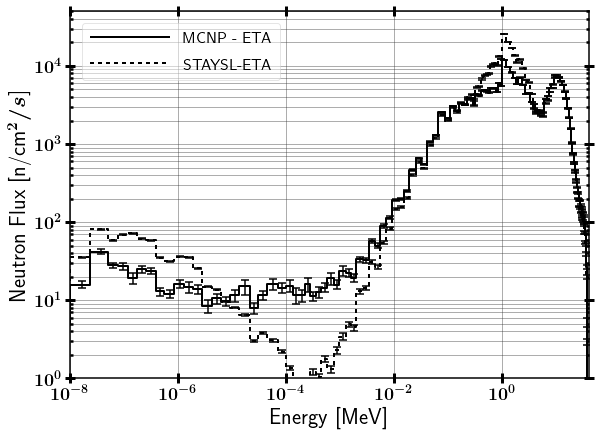

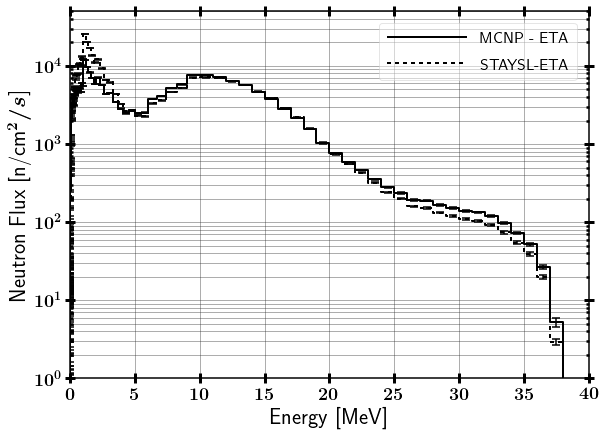

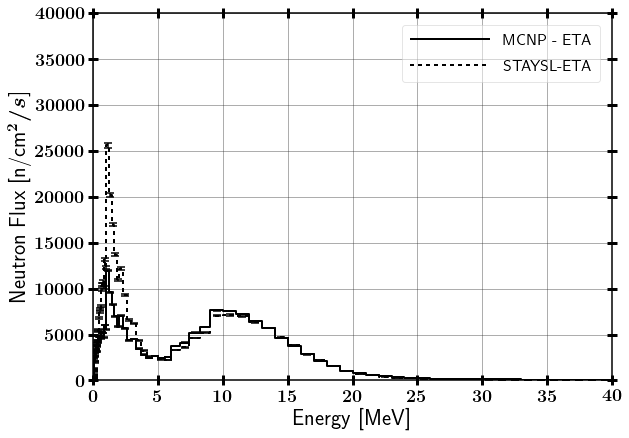

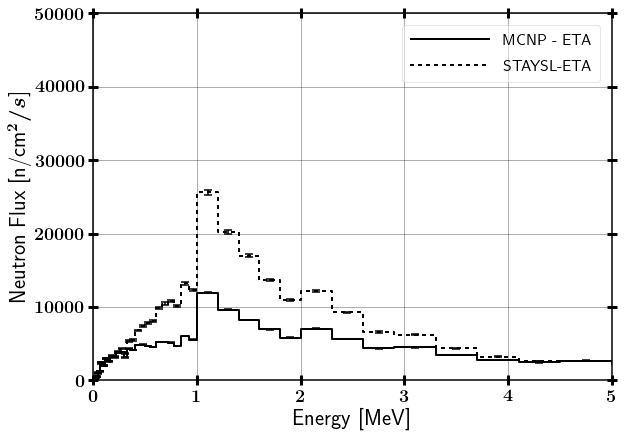

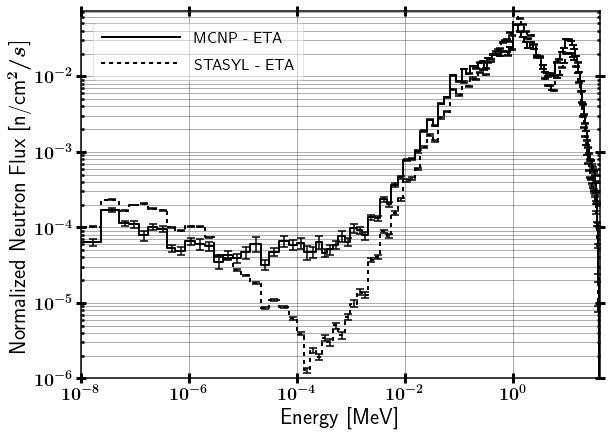

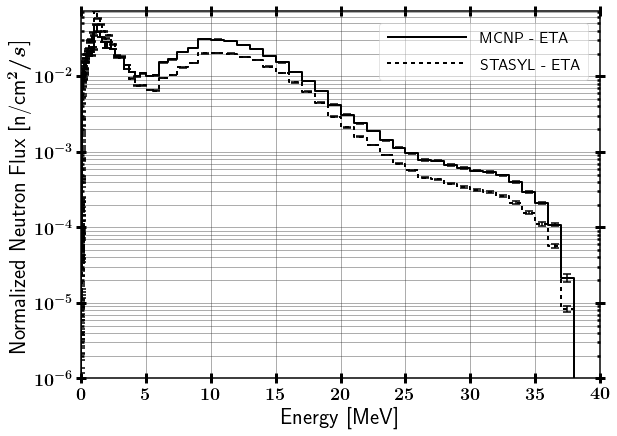

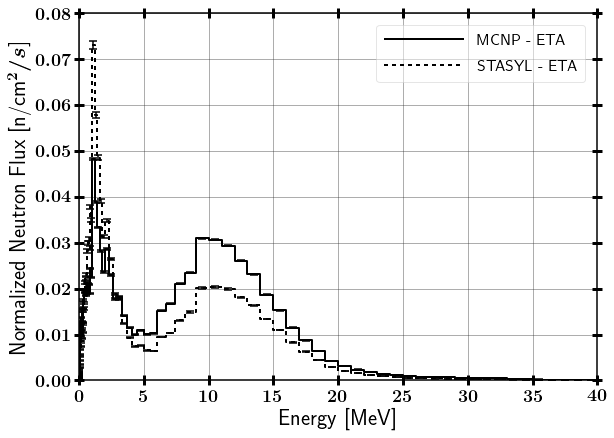

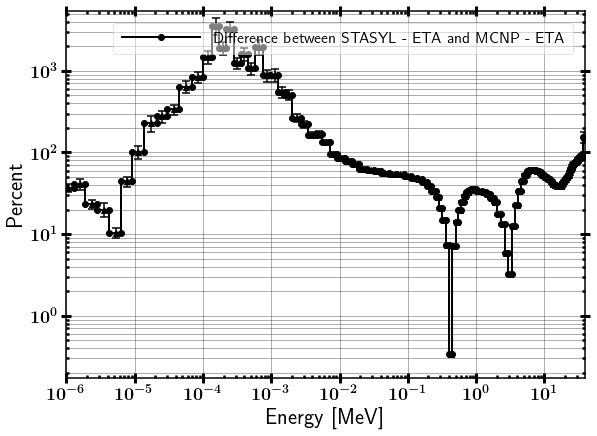

In [64]:
from DataAnalysis.Stats import red_chisq

iter = 0
iterAdjHisto[iter].build_histo(iterSoln[iter]._df['lowE'].tolist(),iterSoln[iter]._df['adjFlux'].tolist(),
                             uncert=(iterSoln[iter]._df['adjStd']*iterSoln[iter]._df['adjFlux']).tolist(),
                             edgeLoc='low', name='STAYSL-ETA')

print "Beam Flux = {:2e}".format(sum(bin_integration(beamDF['lowE'].tolist(), beamDF['adjFlux'].tolist(), 'low')))
print "MCNP ETA Flux = {:2e}".format(sum(tallyFrame['normTally']))
print "STAYSL ETA Flux = {:2e}".format(sum(iterSoln[iter]._df['adjFlux']))

print "Sim to Experimental Chi^2 = {}".format(red_chisq(iterAdjHisto[iter].midPtData, 
                                                         mcnpHisto.midPtData[:len(iterAdjHisto[iter].midPtData)], 
                                                         standDev=iterAdjHisto[iter].sigma , freeParams=2))

# Plot comparison of MCNP simulation for ETA to STAYSL ETA unfold
mcnpHisto.plot(iterAdjHisto[iter], xMin=1E-8, xMax=40, yMin=1, yMax=5E4, logX=True, logY=True, includeMarkers=False,
              title='', xLabel='Energy [MeV]', yLabel='Neutron Flux [n/cm^2/s]', legendLoc=2,
              savePath=outpath+'33MeVTa_ETA_Comp-Sim-Exp_log')
mcnpHisto.plot(iterAdjHisto[iter], xMin=1E-6, xMax=40, yMin=1, yMax=5E4, logX=False, logY=True, includeMarkers=False,
              title='', xLabel='Energy [MeV]', yLabel='Neutron Flux [n/cm^2/s]',
              savePath=outpath+'33MeVTa_ETA_Comp-Sim-Exp_semilog')
mcnpHisto.plot(iterAdjHisto[iter], xMin=1E-6, xMax=40, yMin=1, yMax=4E4, logX=False, logY=False, includeMarkers=False,
              title='', xLabel='Energy [MeV]', yLabel='Neutron Flux [n/cm^2/s]',
              savePath=outpath+'33MeVTa_ETA_Comp-Sim-Exp_lin')
mcnpHisto.plot(iterAdjHisto[iter], xMin=1E-6, xMax=5, yMin=1, yMax=5E4, logX=False, logY=False, includeMarkers=False,
              title='', xLabel='Energy [MeV]', yLabel='Neutron Flux [n/cm^2/s]')

# Plot normalized comparison of MCNP simulation for ETA to STAYSL ETA unfold
etaNormHisto = Histogram()
iterSoln[iter]._df['normAdjFlux'] = iterSoln[iter]._df['adjFlux'] / sum(iterSoln[iter]._df['adjFlux'])
iterSoln[iter]._df['normAdjStd'] = iterSoln[iter]._df['adjStd'] *iterSoln[iter]._df['normAdjFlux']
etaNormHisto.build_histo(iterSoln[iter]._df['lowE'].tolist(), iterSoln[iter]._df['normAdjFlux'].tolist(), 
                              uncert=iterSoln[iter]._df['normAdjStd'].tolist(), edgeLoc='low',
                              name='STASYL - ETA')
mcnpETANormHisto.plot(etaNormHisto, xMin=1E-8, xMax=40, yMin=1E-6, logX=True, logY=True, includeMarkers=False,
              title='', xLabel='Energy [MeV]', yLabel='Normalized Neutron Flux [n/cm^2/s]', legendLoc=2,
              savePath=outpath+'33MeVTa_ETA_NormComp-Sim-Exp_log')
mcnpETANormHisto.plot(etaNormHisto, xMin=1E-6, xMax=40, yMin=1E-6, logX=False, logY=True, includeMarkers=False,
              title='', xLabel='Energy [MeV]', yLabel='Normalized Neutron Flux [n/cm^2/s]',
              savePath=outpath+'33MeVTa_ETA_NormComp-Sim-Exp_semilog')
mcnpETANormHisto.plot(etaNormHisto, xMin=1E-6, xMax=40, yMax=0.08, logX=False, logY=False, includeMarkers=False,
              title='', xLabel='Energy [MeV]', yLabel='Normalized Neutron Flux [n/cm^2/s]',
              savePath=outpath+'33MeVTa_ETA_NormComp-Sim-Exp_lin')

# Relative difference between the sim and experimental result.
diffNormHisto = etaNormHisto.relDiff(mcnpETANormHisto)
diffNormHisto.plot(xMin=1E-6, logX=True, logY=True, xLabel='Energy [MeV]', yLabel='Percent')

#iterRatioHisto[iter].build_histo(iterSoln[iter]._df['lowE'].tolist(), iterSoln[iter]._df['fluxRatio'].tolist(), edgeLoc='low')
#iterRatioHisto[iter].plot(xMin=1E-6, xMax=40, logX=False, logY=False, includeMarkers=False,
#              title='Ratio between STAYSL and MCNP', xLabel='Energy [MeV]', yLabel='Ratio',
#              savePath=outpath+'33MeVTa_Staysl-MCNP-Ratio_Itr{:1d}'.format(iter))

### Iterative Solution #2:

  - A uniform spectrum of 5E-7 with 100% uncertainty is used.
  - It does update the uncertainty throughout the convergence process. 

In [28]:
stayslPath = 'C:/Users/James/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/Activation/33MeVTa_25Apr/Unfold/ETA/STAYSL_PNNL/Iteration2/'

iterSoln.append(IterativeSTAYSL(stayslPath, updateStd=True, chiConv=0.002))
print iterSoln[-1]

iterSoln[-1].run()

# Add to plot lists
iterAdjHisto.append(Histogram())
iterRatioHisto.append(Histogram())

IterativeSTYASL:
STAYSL Path: C:/Users/James/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/Activation/33MeVTa_25Apr/Unfold/ETA/STAYSL_PNNL/Iteration2/
$\chi^2$ Convergence: 0.002
Flux Std  Convergence: 0.1
Update Flux Std Each Iteration: True
Number of Energy Groups: 140

The file exists at: C:/Users/James/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/Activation/33MeVTa_25Apr/Unfold/ETA/STAYSL_PNNL/Iteration2/stayslin.out
Chi^2 = 1027.31716, Std Norm = 10.1270098943
Chi^2 = 9.12627
Chi^2 = 4.42041
Chi^2 = 3.52165
Chi^2 = 3.39344
Chi^2 = 3.32993
Chi^2 = 3.28887
Chi^2 = 3.25949
Chi^2 = 3.23715
Chi^2 = 3.21942
Chi^2 = 3.20489
Chi^2 = 3.19245
Chi^2 = 3.18175
Chi^2 = 3.17229
Chi^2 = 3.16381
Chi^2 = 3.1561
Chi^2 = 3.14903
Chi^2 = 3.14252
Chi^2 = 3.13648
Chi^2 = 3.13076
Chi^2 = 3.12534
Chi^2 = 3.12024
Chi^2 = 3.11535
Chi^2 = 3.11067
Chi^2 = 3.1061
Chi^2 = 3.10169
Chi^2 = 3.09754
Chi^2 = 3.09346
Chi^2 = 3.08951
Chi^2 = 3.08565
Chi^2 = 3.08197
Chi^2 = 3.07817
Chi^2 = 3.07447
Chi^2 = 3.0

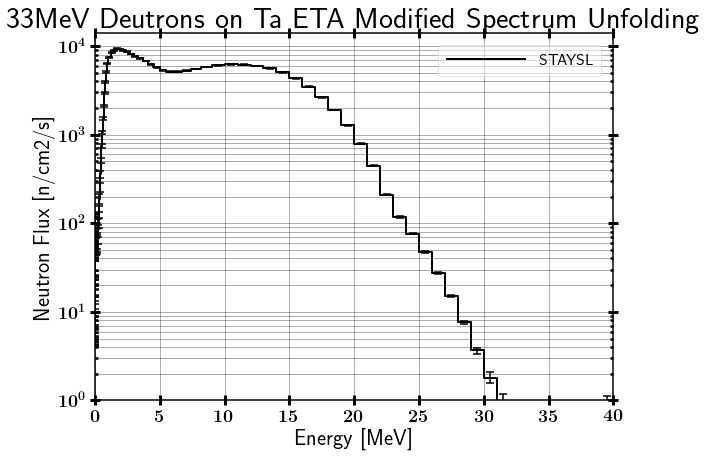

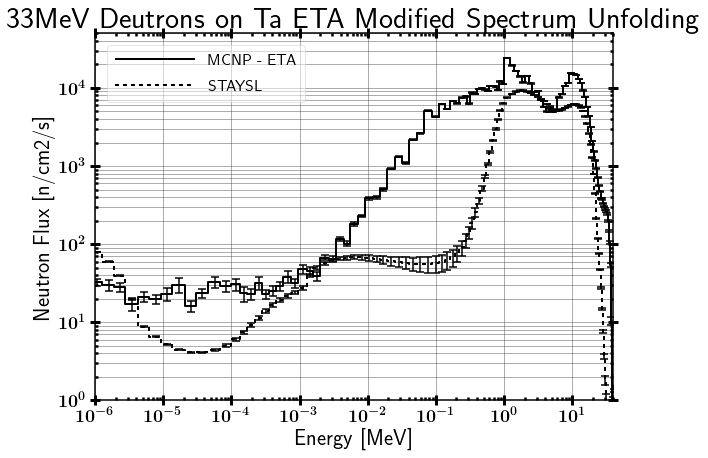

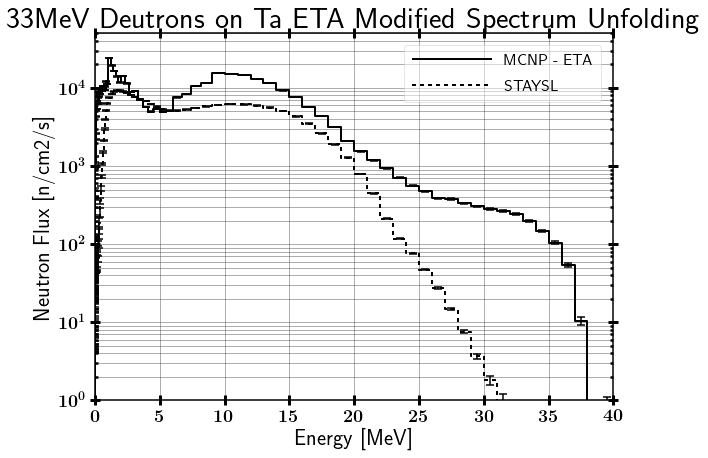

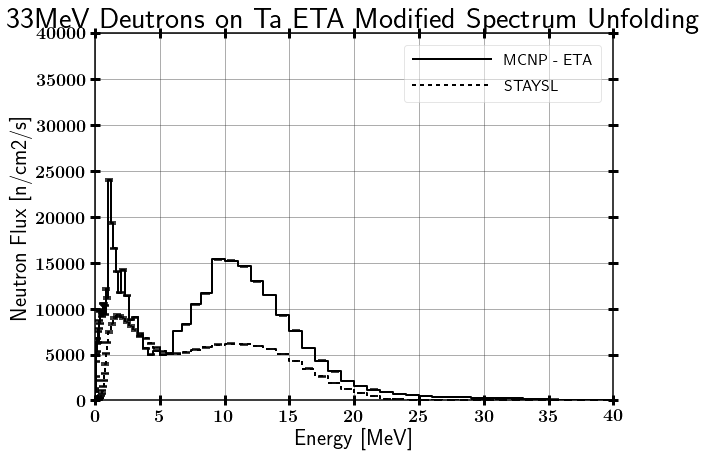

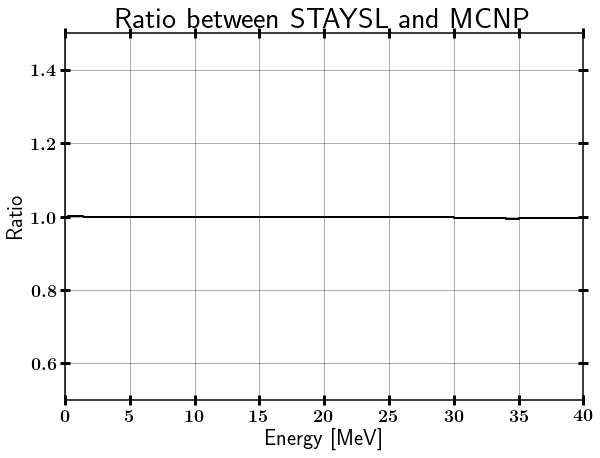

In [29]:
iter = 1

iterAdjHisto[iter].build_histo(iterSoln[iter]._df['lowE'].tolist(),iterSoln[iter]._df['adjFlux'].tolist(),
                             uncert=(iterSoln[iter]._df['adjStd']*iterSoln[iter]._df['adjFlux']).tolist(),
                             edgeLoc='low', name='STAYSL')

iterAdjHisto[iter].plot(xMin=1E-6, xMax=40, yMin=1, logX=False, logY=True, includeMarkers=False,
              title='33MeV Deutrons on Ta ETA Modified Spectrum Unfolding',
              xLabel='Energy [MeV]', yLabel='Neutron Flux [n/cm2/s]')
              #savePath=outpath+'33MeVTa_Staysl-Unfold_Itr{:1d}'.format(iter))

mcnpHisto.plot(iterAdjHisto[iter], xMin=1E-6, xMax=40, yMin=1, yMax=5E4, logX=True, logY=True, includeMarkers=False,
              title='33MeV Deutrons on Ta ETA Modified Spectrum Unfolding',
              xLabel='Energy [MeV]', yLabel='Neutron Flux [n/cm2/s]', legendLoc=2)
mcnpHisto.plot(iterAdjHisto[iter], xMin=1E-6, xMax=40, yMin=1, yMax=5E4, logX=False, logY=True, includeMarkers=False,
              title='33MeV Deutrons on Ta ETA Modified Spectrum Unfolding',
              xLabel='Energy [MeV]', yLabel='Neutron Flux [n/cm2/s]')
mcnpHisto.plot(iterAdjHisto[iter], xMin=1E-6, xMax=40, yMin=1, yMax=4E4, logX=False, logY=False, includeMarkers=False,
              title='33MeV Deutrons on Ta ETA Modified Spectrum Unfolding',
              xLabel='Energy [MeV]', yLabel='Neutron Flux [n/cm2/s]')

iterRatioHisto[iter].build_histo(iterSoln[iter]._df['lowE'].tolist(), iterSoln[iter]._df['fluxRatio'].tolist(), edgeLoc='low')
iterRatioHisto[iter].plot(xMin=1E-6, xMax=40, logX=False, logY=False, includeMarkers=False,
              title='Ratio between STAYSL and MCNP', xLabel='Energy [MeV]', yLabel='Ratio')
              #savePath=outpath+'33MeVTa_Staysl-MCNP-Ratio_Itr{:1d}'.format(iter))